# Ciência de Dados - Projeto 3

## Análise de previsão de doenças cardiovasculares

**Alunas: Gabriela Mitu, Gabriella Cukier, Alexandre Cury**

________

## Introdução

Segundo a organização Pan-Americana da Saúde, doenças cardiovasculares são a principal causa de morte no mundo. Mais de 17 milhões de pessoas morreram por causa delas em 2015, o que representa 31% de todas as mortes em nível global.

A causa de doenças cardiovasculares envolve uma série de variáveis, como arritmias, insuficiência venosa, cardiopatia congênita, entre outras.

Visto a gravidade de tal questão, a previsão de doenças cardiovasculares é considerada um dos mais importantes assuntos na seção de análise de dados clínicos. Desta forma, a mineração de dados transforma a grande coleção de dados brutos de assistência médica em informações que podem auxiliar na tomada de decisões.

Portanto, com o objetivo de apoiar este estudo, foi escolhido este tema de análise de doenças cardiovasculares para o Projeto 3 de Ciência de Dados com a uso de ferramentas como o python para desenvolver um Machine Learning através de um DataSet do repositório da UCI.

O método utilizado será o de aprendizado supervisionado com o intuito de prever um rótulo (se alguém terá ou não a doença  cardíaca).
Para atingir esse objetivo, foram selecionados alguns atributos a serem analisados, contidos nas colunas do dataset.  Eles estão relacionados com exames de pacientes. É importante ressaltar que apenas um destes fatores isolados não é suficiente para o surgimento de uma doença, porém a combinação de alguns pode ser determinante.


•	Idade


•	Sexo (0=Mulher, 1=Homem)


•	Presença de dores no peito
Tipo número 1: Angina Típica
Tipo número 2: Angina Atípica
Tipo número 3: Dor não anginosa
Tipo número 4: Ausência de dor


•	Pressão sanguínea em repouso


•	Colesterol


•	Glicemia 
Quando maior que 120mg/dl, mais chances de diabetes, então, 1=True (mais chance de ter doença cardiovascular), caso contrário: 0=False (saudável, menos chance de ter a doença)



•	Medida do eletrocardiograma em repouso


•	Frequência cardíaca máxima 


•	Dores no peito temporárias causadas por exercícios


•	Anormalidades vistas no eletrocardiograma em período de exercícios
Com base no pico do segmento ST do exercício, um teste de esforço no eletrocardiograma em esteira é considerado anormal quando há uma depressão do segmento ST horizontal ou inclinada para baixo ≥ 1 mm a 60-80 ms. Ou seja, 3 é considerado normal e 1 e 2 são anormais (não saudável).



•	Supranivelamento do segmento ST



•	Número de principais vasos sanguíneos coloridos no exame de fluoroscopia (0-3)


•	Produção anormal de hemoglobina
Até 3 = normal, entre 3 e 6=defeito irreparável, 7=defeito reversível)



Além disso, o dataset contém a coluna de presença de doenças cardíacas, que será importante para ensinar o classificador.


________
# Import  das libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
dados=pd.read_csv("heart.csv")

_______
## Adaptação do idioma do DataSet 

In [4]:
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Como é possível ver, há um total de 14 colunas, cada uma equivalente a uma variável independente e que será estudada minunciosamente para o desenvolvimento do machine learning e identificar aqueles que apresentam doença cardíaca ou não apresentam.

____
## Análise dos dados

Para se ter uma melhor noção da composição do DataSet escolhido, será plotado um gráfico com a frequência daqueles que sofrem de alguma doença cardiovascular - quer será representado como target: 1 - e daqueles que não sofrem da doença - target: 0.

## Separação das variáveis

O dataset escolhido contém tanto variáveis qualitativas quanto quantitativa, que demandam abordagens anaíticas distintas Portanto, foram separadas para sua análise

In [5]:
var_num=['idade','pressao','freq_card_max','efeito_exercicio','colesterol']
var_cat=[x for x in dados.columns if x not in var_num]

# Análise exploratória

## Target 

In [6]:
target=(dados.diagnostico.value_counts())
target

1    165
0    138
Name: diagnostico, dtype: int64

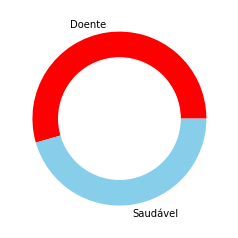

In [7]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(target, labels=('Doente','Saudável'), colors=['red','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

A partir do gráfico e codificação nas células anteriores, é possível observar que a frequência de ambos os grupos está visualmente equilibrada, o que será importante para o desenvolvimento do machine learning

## Variáveis quantitativas

In [8]:
dados[var_num].describe()

,idade,pressao,freq_card_max,efeito_exercicio,colesterol
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,149.646865,1.039604,246.264026
std,9.082101,17.538143,22.905161,1.161075,51.830751
min,29.000000,94.000000,71.000000,0.000000,126.000000
25%,47.500000,120.000000,133.500000,0.000000,211.000000
50%,55.000000,130.000000,153.000000,0.800000,240.000000
75%,61.000000,140.000000,166.000000,1.600000,274.500000
max,77.000000,200.000000,202.000000,6.200000,564.000000


In [9]:
corrdados=dados[var_num].corr()

In [10]:
var_num=['idade','pressao','freq_card_max','efeito_exercicio','colesterol']
var_cat=[x for x in dados.columns if x not in var_num]

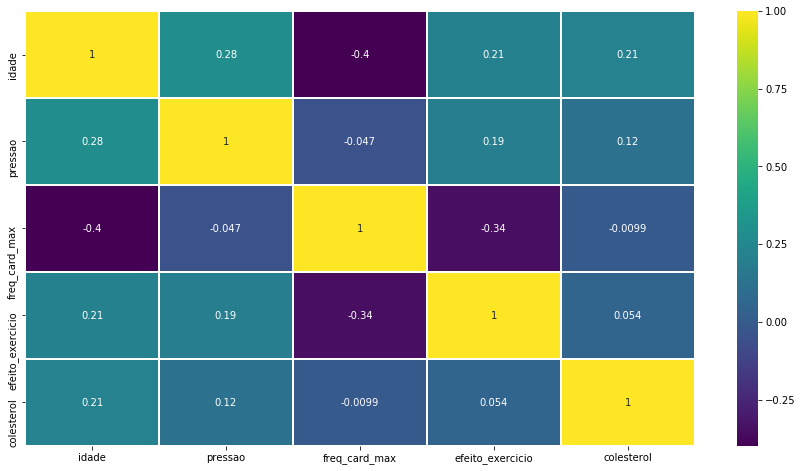

In [11]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(corrdados, annot = True, cmap='viridis', linecolor='white',  linewidths=1)
plt.show()

# plot using a color palette
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
 
#add this after your favorite color to show the plot
#sns.plt.show()

A tabela acima indica as relações entre as variáveis quantitativas do dataset, atreladas à aquisição de doenças cardíacas. Percebe-se que a maior parte das variáveis possui um efeito mediano a pequeno nas outras. Isoladamente, nenhuma delas tem um grande efeito na determinação de outra característica referente à saúde do sujeito. Por conta disso, a previsão de possíveis doenças cardíacas deve levar em conta multiplos fatores.

Agumas variáveis, entretanto, chamam a atenção por possuirem uma correlação maior em módulo, com cerca de de 0,4. É o caso, principalmente, díaca máxima em relação à idade e ao efeito do exercício.

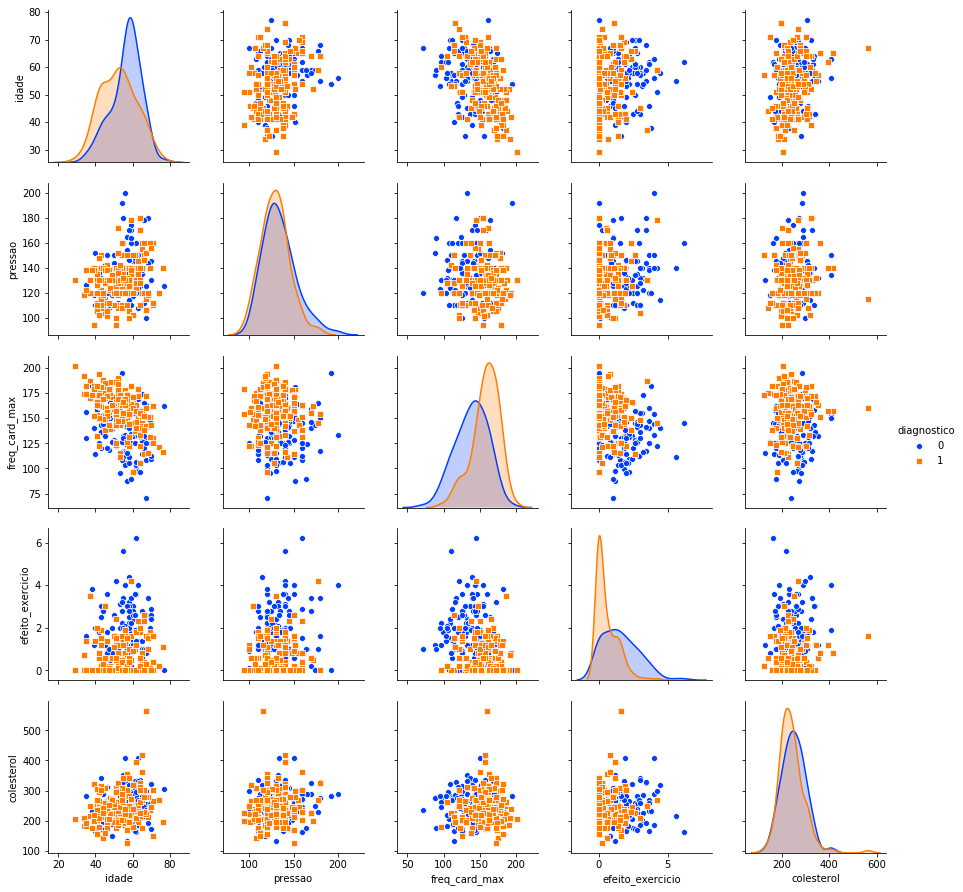

In [12]:
sns.pairplot(dados, hue = 'diagnostico', markers=["o", "s"], vars = [v for v in var_num], palette = sns.color_palette("bright", 10))

O gráfico de dispersão acima compara os atributos relacionados à aquisição de doenças cardíacas de pessoas doentes (em laranja) e saudáveis(em azul). Percebe-se que no caso de alguns atributos não há uma diferença significativa na distribuição estatística entre pessoas que possuem a doença cardiovascular e as que não. Este é o caso da pressão sanguínea e do colesterol, para os quais as curvas de distribuição dos dados de ambos os grupos praticamente se sobrepõem.

Para o caso de outros atributos, há uma distinção evidente nas características de pessoas que possuem ou não doenças. É o caso da idade, da frequência cardíaca máxima e, principalmente, do efeito do exercício. A diferença nessa distribuição fica mais evidente nos histogramas e na tabela a seguir:

In [13]:
from pandas import DataFrame
doente=dados[dados['diagnostico']==1]
saudavel=dados[dados['diagnostico']==0]

d=doente[var_num].mean()
s=saudavel[var_num].mean()
df = DataFrame((d), columns= ['Doente'])
df2 = DataFrame((s), columns= ['Saudável'])

df = df.join(df2, how='inner', lsuffix=' ', rsuffix=' ')
df
sns.set(font_scale=1.2)


#sns.heatmap(df, annot=True,cmap="YlGnBu")
df

,Doente,Saudável
idade,52.496970,56.601449
pressao,129.303030,134.398551
freq_card_max,158.466667,139.101449
efeito_exercicio,0.583030,1.585507
colesterol,242.230303,251.086957


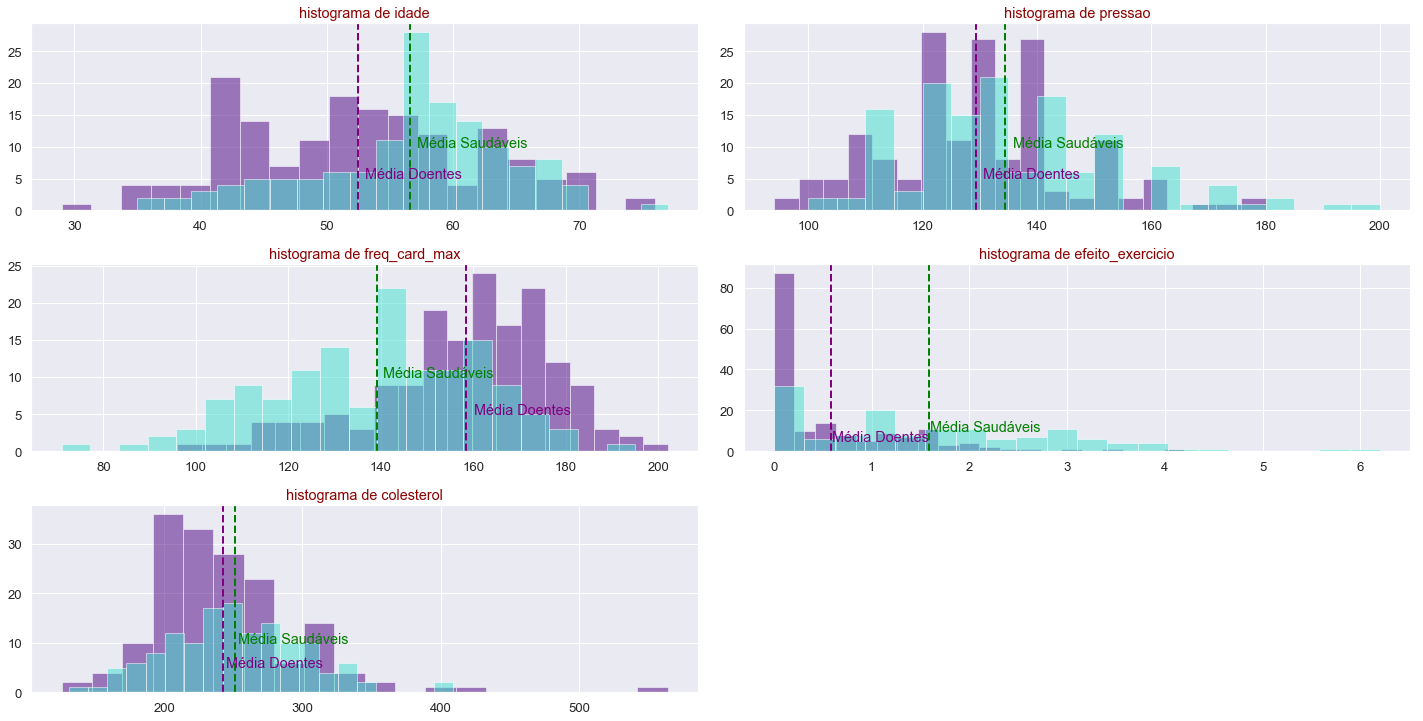

In [14]:
doente=dados[dados['diagnostico']==1]
saudavel=dados[dados['diagnostico']==0]


def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    


def draw_histograms(dataframe, dataframe2, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plot1=dataframe[feature].hist(bins=20,ax=ax,color='indigo', alpha=0.5, label='Doente')
        plot2=dataframe2[feature].hist(bins=20,ax=ax,color='turquoise', alpha=0.5, label='Saudável')
        verticalLine(plot1, dataframe[feature].mean(), 5, "purple", "Média Doentes")
        verticalLine(plot2, dataframe2[feature].mean(), 10, "green", "Média Saudáveis")

        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(doente[var_num],saudavel[var_num],saudavel[var_num].columns,6,2)

No caso da pressão e do colesterol, a média dos valores de pessoas doentes e saudáveis é muito próxima, o que sustenta aquilo demonstrado no gráfico de dispersão acima. Isso significa que essas variáveis não são as mais importantes na classificação da aquisição da doença.

No caso da idade, nota-se que a maior parte dos indivíduos no estudo que possuia a doença era mais velha que aqueles isentos. 
Isso indica que as doenças cardiovasculares são mais comuns em idades mais avançadas.

O histograma da frequência cardíaca máxima mostra que pessoas saudáveis alcançaram frequências cardíacas mais altas no teste, o que condiz com o esperado de um coração saudável.

O gráfico do efeito do exercicío também é muito revelador. Ele indica que pessoas sem doenças sofreram significativamente menos os efeitos da atividade física do que aqueles que a possuem.

## Variáveis qualitativas

In [15]:
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
def categ(x):
    dados[x] = dados[x].astype('category')

categ('sexo')

dados.sexo.cat.categories = ({ 0:'Mulher', 1:'Homem'})
categ('dores_peito')
dados.dores_peito.cat.categories = ({1:'Angina normal', 2:'Angina anormal', 3:'Dor não anginosa', 4:'Assintomático'})
categ('glicemia')
dados.glicemia.cat.categories = ({0:'<=120mg/dl', 1:'>120mg/dl'})
categ('eletrocar_repouso')
dados.eletrocar_repouso.cat.categories = ({0:'Normal', 1:'Problema', 2:'Hipertrofia'})#################
categ('angina_exercicio')
dados.angina_exercicio.cat.categories = ({0:'Não', 1:'Sim'})
categ('eletrocar_exercicio')
dados.eletrocar_exercicio.cat.categories = ({1:'Crescente', 2:'Constante', 3:'Decrescente'})
#categ('vasos') -> Já contém o número de vasos coloridos no exame
#categ('hemoglobina')
#dados.hemoglobina.cat.categories = ('Mulher', 'Homem')
categ('diagnostico')
dados.diagnostico.cat.categories = ({0:'Não tem', 1:'Tem'})


Text(0, 0.5, 'Frequência Relativa (em %)')

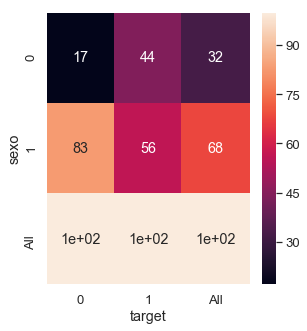

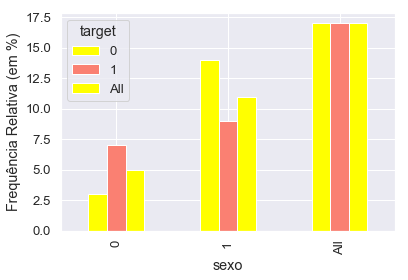

In [17]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)


fig=plt.figure(figsize=(10,5))
plt.subplot(121)

sexo=pd.crosstab(dados.sexo,dados.diagnostico,margins=True,rownames=['sexo'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(sexo, annot=True)

sexo = (sexo/sexo.sum().sum()*100).round(decimals=0)
sexo.plot(kind='bar', color=('yellow', 'salmon'))
plt.ylabel('Frequência Relativa (em %)')

Percebe-se que o total de homens é maior. Além disso, A incidência de ataques cardíacos em homens é mais alta. Isso condiz com dados do estudo "The heart attack gender gap", da Harvard Medical School. Segundo o estudo, indivíduos do gênero masculino, além de serem mais propensos à aquisição de doenças cardíacas, demonstram sintomas quando mais jovens. As mulheres, por sua vez, são geralmente mais velhas ao adquirirem a doença, com cerca de 60 a 70 anos. Desse modo, como o estudo foi realizado com pessoas de média de 54 anos, é de se esperar que a porcentagem de homens doentes seja superior.

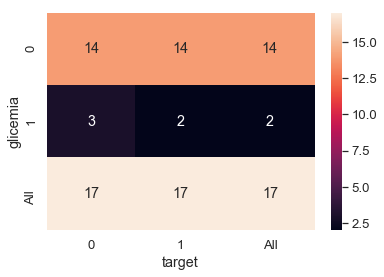

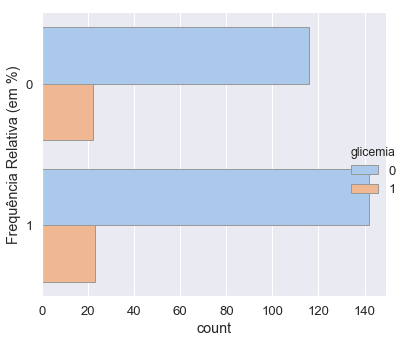

<Figure size 432x288 with 0 Axes>

In [18]:
gli=pd.crosstab(dados.glicemia,dados.diagnostico,margins=True,rownames=['glicemia'], colnames=['target']).apply(percConvert, axis=0)

gli2 = (gli/gli.sum().sum()*100).round(decimals=0)


#fig=plt.figure(figsize=(15,5))
#plt.subplot(121)
plot=sns.heatmap(gli2, annot=True)
glicemia=sns.catplot(y="diagnostico", hue="glicemia", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

#plot2=ct2.plot(kind='bar', color=('yellow', 'salmon'))

plt.ylabel('Frequência Relativa (em %)')

plt.tight_layout()
plt.show()
    
plt.tight_layout()
plt.show()


Percebe-se que o nível de glicose no sangue é parecido para os indivídous estudados. Isso indica que o nível de glicose como medido no estudo (parâmetro de 120mg/dl) não é determinante na presença de doenças cardíacas. O estudo "Is there a link between glucose levels and heart failure? " aponta que a glicemia é importante para a aquisição de tais doenças, porém, vincula os problemas de saúde à hiperglicemia (acima de 150mg/dl). Além disso, tais problemas seriam mais comuns em pacientes que possuem diabetes a longo prazo. Portanto, conclui-se que para uma melhor exatidão, os parâmetros do dataset referentes a tal variável poderiam ser mais precisos se uma variável quantitativa tivesse sido usada, distinguindo casos de glicemia muito alta daqueles com valores próximos a 120.

## Eletrocardiogramas

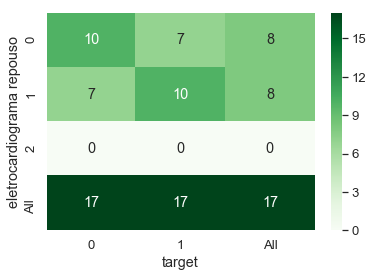

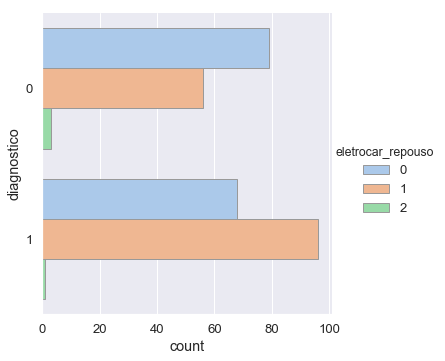

In [19]:
er=pd.crosstab(dados.eletrocar_repouso,dados.diagnostico,margins=True,rownames=['eletrocardiograma repouso'], colnames=['target']).apply(percConvert, axis=0)

ers = (er/er.sum().sum()*100).round(decimals=0)

plot=sns.heatmap(ers, annot=True, cmap="Greens")


erg=sns.catplot(y="diagnostico", hue="eletrocar_repouso", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

plt.show()

O gráfico indica que aqueles que possuem a doença, têm uma maior variação no eletrocardiograma durante o exame(0 e 2), ou seja, os batimentos são instáveis. Já aqueles saudáveis, possuem maior estabilidade (indicada pelo número 1)

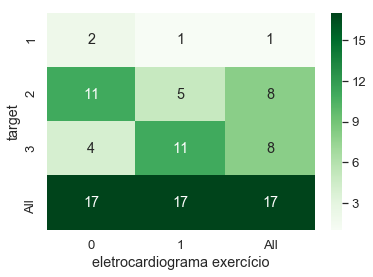

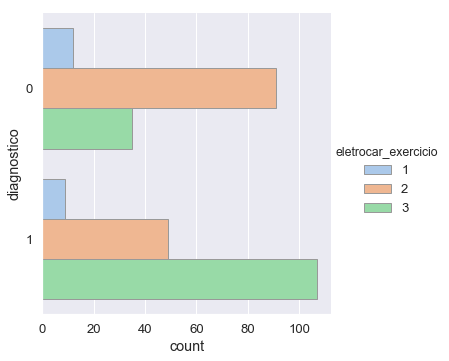

In [20]:
ct32=pd.crosstab(dados.eletrocar_exercicio,dados.diagnostico,margins=True,rownames=['target'], colnames=['eletrocardiograma exercício']).apply(percConvert, axis=0)


ct32 = (ct32/ct32.sum().sum()*100).round(decimals=0)

plot3=sns.heatmap(ct32, annot=True, cmap="Greens")


plot4=sns.catplot(y="diagnostico", hue="eletrocar_exercicio", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

#plt.tight_layout()
plt.show()
    

Durante o exercício, é esperado que a frequência cardíaca suba (indicado pela coluna 3, em verde). Isso acontece para as pessoas saudáveis. Porém, nota-se que os batimentos dos doentes não sobem significativamente. Na realidade, eles permanecem constantes, o que indica uma dificuldade no bombeamento de sangue.

## Vasos coloridos no exame

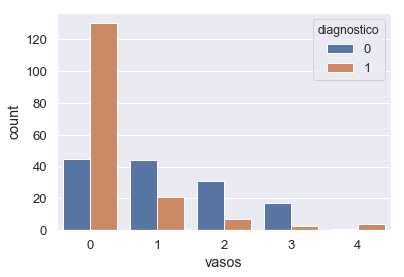

In [21]:
sns.countplot(x="vasos", hue='diagnostico', data=dados)


Aqueles que possuem a doença tiveram menos vasos sanguíneos coloridos no exame.

Tabela Cruzada por total de COLUNAS (em %):


C:\Users\gabic\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


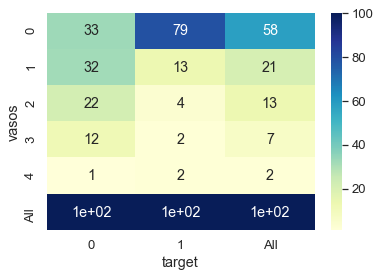

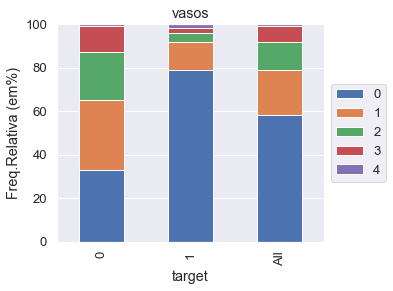

In [22]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.vasos,dados.diagnostico,margins=True,rownames=['vasos'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True, cmap="YlGnBu")

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='vasos')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




Para realizar a análise do gráfico e do heatmap, é preciso salientar que os números na categoria "vasos" equivale ao número de vasos principais obstruídos identificados por fluoroscopia, ou seja, mais chances de contrair aterosclerose. Desta forma, pode-se teorizar que quanto maior o número, maiores as chances de apresentar alguma doença cardiovascular.

Observando agora ambos os plots, é possível visualizar que o target 1 - pessoas saudáveis - tem maior frequência de menos vasos identificados em fluoroscopia, como o esperado.

## Angina e Dores no peito

Tabela Cruzada por total de COLUNAS (em %):
Legendas de tipos de dores: 
-------------------------
Tipo número 1: Angina Típica
Tipo número 2: Angina Atípica
Tipo número 3: Dor não anginosa
Tipo número 4: Ausência de dor


C:\Users\gabic\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


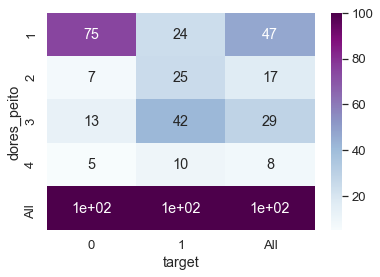

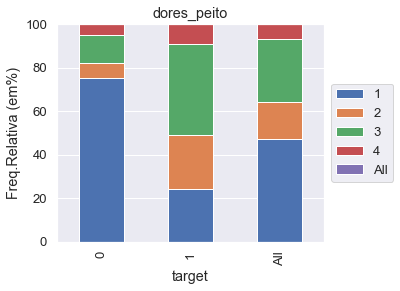

In [23]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.dores_peito,dados.diagnostico,margins=True,rownames=['dores_peito'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True,  cmap="BuPu")

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='dores_peito')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print('Legendas de tipos de dores: ')
print('-'*25)
print('Tipo número 1: Angina Típica')
print('Tipo número 2: Angina Atípica')
print('Tipo número 3: Dor não anginosa')
print('Tipo número 4: Ausência de dor')

Conforme afirma a legenda, maior o número, maior a dor da pessoa, ou seja, espera-se que 1 seja a maior chance de haver um distúrbio cardíaco 0 é menor teoricamente.

Observando o que foi plotado, é possível confirmar isso. O target 0, como já se sabe, equivale às pessoas que apresentam doenças cardiovasculares, por isso, a Frequência Relativa do Tipo 1 (em azul) é maior neste grupo e o tipo 4 (em vermelho) é menor. Já, o target 2, apresenta a frequência do tipo 1 muito menor e o tipo 4, um pouco maior.

No Heatmap, essa diferença é ainda mais visível, a correlação do target 0 e o tipo 1 estão bem destacadas e no target 1, nenhum dos tipos das dores está muito destacada.

## Hemoglobina

Tabela Cruzada por total de COLUNAS (em %):


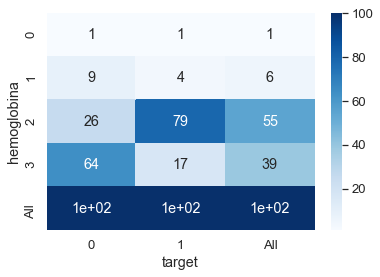

In [24]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.hemoglobina,dados.diagnostico,margins=True,rownames=['hemoglobina'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True, cmap="Blues")



No Dataframe, todos os pacientes analisados não possuem Talassemia (problemas ne hemoglobina no sangue). Isso é compreensível, já que a doença afeta apenas cerca de 0,03% da população, segundo o ' Global Burden of Disease Study ', sendo, portanto, extremamente rara.

# Conclusão da análise exploratória

Com base nos dados apresentados, fica flaro que algumas variáveis possuem mais relevância na determinação de doenças cardíacas. As mais importantes são:


-idade

-frequência cardíaca máxima

-efeito do exercício

-sexo


-medidas de eletrocardiogramas

-dores e angina no peito

# Previsão de doenças cardíacas com diferentes classificadores

____
## Mecanismo

A realização do projeto contará com vários algoritmos como a Regressão Logística, Decision Tree Classifier, Random Forest, e K Neighbors Classifier - todos já frequentemente utilizado nas ciência biológicas, assim como no estudo de doenças cardiovasculares para estudar variáveis independentes. Cada um resultará em uma acurácia diferente devido à técnica singular deles. Assim, será possível, por meio da comparação entre os resultados, fazer um estudo de qual será mais eficiente para o desenvolvimento da machine learning.

----------


In [55]:
dados=pd.read_csv("heart.csv")
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
dados.isnull().sum()


idade                  0
sexo                   0
dores_peito            0
pressao                0
colesterol             0
glicemia               0
eletrocar_repouso      0
freq_card_max          0
angina_exercicio       0
efeito_exercicio       0
eletrocar_exercicio    0
vasos                  0
hemoglobina            0
diagnostico            0
dtype: int64

Nota-se que nenhum dos atributos do dataset tem valor nulo ou Nan, o que é fundamental para o processamento dos dados.

### Separação da planilha de teste e de treino

In [57]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

In [58]:
print ("Quantidade treinamento dos atributos: " + str(X_train.shape))
print ("Quantidade treinamento do target: " + str(y_train.shape))
print ("Quantidade teste dos atributos: " + str(X_test.shape))
print ("Quantidade teste do target: " + str(y_test.shape))

Quantidade treinamento dos atributos: (203, 13)
Quantidade treinamento do target: (203,)
Quantidade teste dos atributos: (100, 13)
Quantidade teste do target: (100,)


As proporçoes escolhidas foram 33% dos dados para o teste e o restante para o treino. É importante que o treino contenha uma quantidade suficientemente grande de dados para que os classificadores possam encontrar padrões e "aprender" com as informações.

#### Proporção entre as variáveis no teste e no treino

In [59]:
conta_treinamento = pd.Series(y_train).value_counts()
conta_treinamento


1    107
0     96
Name: diagnostico, dtype: int64

In [60]:
conta_teste = pd.Series(y_test).value_counts()
conta_teste

1    58
0    42
Name: diagnostico, dtype: int64

In [61]:
conta_treinamento[0] / conta_treinamento[1]

0.897196261682243

In [62]:
conta_teste[0] / conta_teste[1]


0.7241379310344828

A proporção entre as variáveis na planilha de teste e de treino é parecida. Isso é importante para garantir um bom funcionamento do algorítimo

## Regressão Logística

**Regressão Logística**

A regressão logística faz predições para lidar com problemas que exigem uma estimativa de probabilidade e tem como "output" - discreto - zero ou um (0/1), além de ser utilizada para calcular a possibilidade de certo evento ocorrer.

Na regressão logística, a probabilidade de ocorrência de um evento pode ser estimada diretamente. Considerando que só há dois "outputs" (0/1) e "p" variáveis independentes, chega-se em:

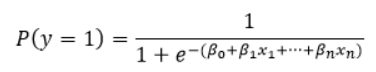

Os coeficiente B0, B1,..., são selecionados de forma que maximize a probabilidade da amostra ter sido observada.

Assim, o gráfico de uma regressão logística fica neste formato:

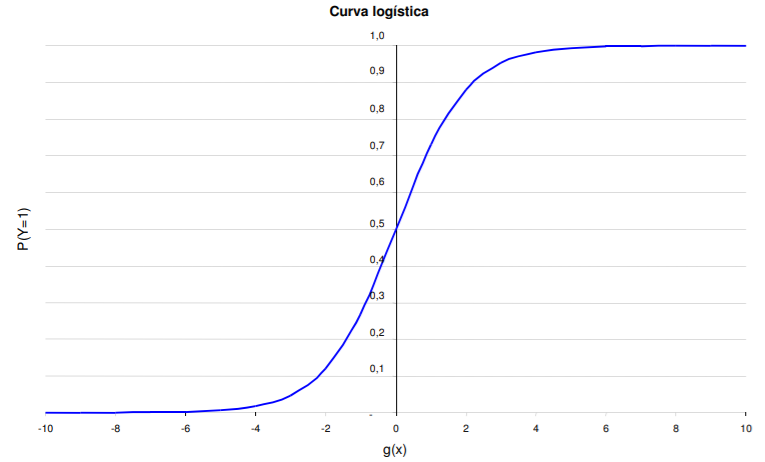

Observa-se ainda que:
- Quando g(x) tende a infinito, P(Y=1) tende a 1
- Quando g(x) tende a menos infinito, P(Y=1) tende a 0

#### Resultado por atributo

In [69]:

import statsmodels.formula.api as sm
model=sm.Logit(y_train,X_train)
result=model.fit()
result.summary()
#results=model.fit(X_train, y_train)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.307045
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            diagnostico   No. Observations:                  203
Model:                          Logit   Df Residuals:                      190
Method:                           MLE   Df Model:                           12
Date:                Mon, 18 Nov 2019   Pseudo R-squ.:                  0.5561
Time:                        17:16:05   Log-Likelihood:                -62.330
converged:                       True   LL-Null:                       -140.41
                                        LLR p-value:                 3.177e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1972      0.271      0.729      0.466      -0.333       0.728
x2            -0.7057      0.284     -2.485      0.013      -1.262      -0.149
x3             1.0308      0.263      3.914      0.000       0.515       1.547
x4            -0.1659      0.230     -0.721      0.471      -0.617       0.285
x5            -0.1074      0.253     -0.424      0.671      -0.603       0.389
x6             0.1131      0.262      0.432      0.666      -0.400       0.626
x7             0.3444      0.244      1.414      0.157      -0.133       0.822
x8             0.3831      0.313      1.222      0.222      -0.231       0.998
x9            -0.5512      0.260     -2.119      0.034      -1.061      -0.041
x10           -0.4734      0.324     -1.462      0.144      -1.108       0.161
x11            0.6573      0.275      2.394      0.017       0.119       1.195
x12           -1.4981      0.325     -4.608      0.000      -2.135      -0.861
x13           -0.8474      0.239     -3.550      0.000      -1.315      -0.380
==============================================================================
"""

Na tabela-resumo da regressão logística, nota-se que algumas variáveis são mais importantes para a classificação do que outras. Adotando o valor de alfa como 5%, pode-se considerar que aqueles atributos que possuem um valor p inferior a tal alfa são mais essenciais na classificação. Algumas variáveis, porém, possuem um valor p significativamente mais alto que alfa, o que não auxilia o algorítimo. São eles: idade, colesterol, pressão e glicemia.

#### Acerto nas previsões

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs', multi_class='auto')


In [71]:
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_pred = model.predict(X_test)
reg=accuracy_score(y_test, y_pred)
print('Acurácia: {}'.format(reg))

Acurácia: 0.81


## Random Forest Classifier

**Random Forest**

Tecnicamente, Random Forest é um método de conjunto (baseado na abordagem de dividir e conquistar) de Decision Trees geradas em um conjunto de dados dividido aleatoriamente. Essa coleção de classificadores de Decision Trees também é conhecida como Forest. As Decision Trees individuais são geradas usando um indicador de seleção de atributo, como ganho de informação, taxa de ganho e índice de Gini para cada atributo. Cada árvore depende de uma amostra aleatória independente. Em um problema de classificação, cada árvore (tree) vota e a classe mais popular é escolhida como resultado final. No caso de regressão, a média de todas as saídas da árvore é considerada o resultado final. É mais simples e mais poderoso em comparação com outros algoritmos de classificação não linear.

Então, basicamente o algoritmo de Random Trees funciona da seguinte maneira:

- Selecina amostras aleatórias de um determinado conjunto de dados.
- Constrói uma Decision Tree para cada amostra e obtém um resultado de previsão de cada árvore de decisão.
- Faz uma votação para cada resultado previsto.
- Seleciona o resultado da previsão com mais votos como a previsão final.

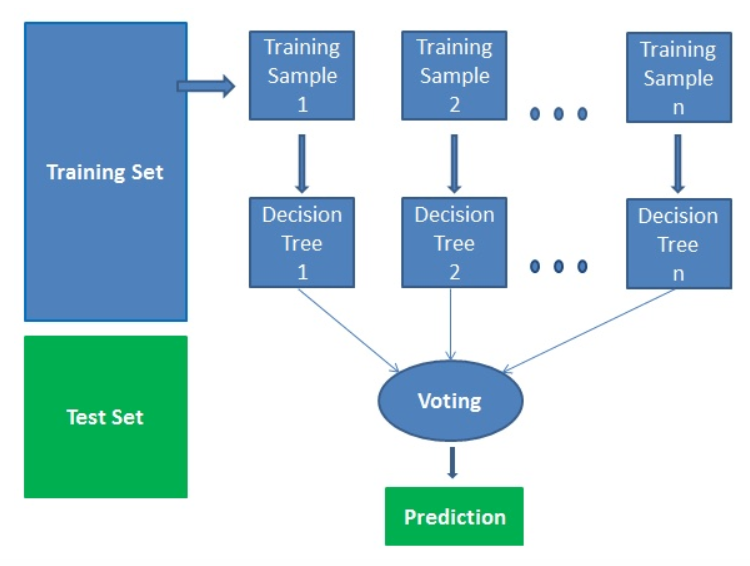

#### Resultados

In [93]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [74]:
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 83.00%


## KNN

**K Neighbors Classifier**

O KNN é um algoritmo de aprendizado não paramétrico - ou seja, a estrutura do modelo é determinada a partir do conjunto de dados - e preguiçoso. O algoritmo preguiçoso significa que ele não precisa de nenhum ponto de dados de treinamento para geração de modelo. Isso torna o treinamento mais rápido e a fase de teste mais lenta. Durante a fase de teste, o KNN precisa de mais tempo para verificar todos os pontos de dados e esta verificação exigirá mais memória para armazenar dados de treinamento.

Sobre o funcionamento, em KNN, K é o número de vizinhos mais próximos. Quando K = 1, o algoritmo é conhecido como o algoritmo vizinho mais próximo. Exemplificando, considerando que P1 seja o ponto para o qual o rótulo precisa prever, primeiro, é encontrado o ponto mais próximo de P1 e, em seguida, o rótulo do ponto mais próximo atribuído a P1. Depois é classificado os pontos pelo voto da maioria de seus k vizinhos. Cada objeto vota em sua classe e a classe com mais votos é tomada como previsão. Para encontrar pontos semelhantes mais próximos, encontra-se a distância entre pontos usando medidas de distância, como distância euclidiana, distância de Hamming, distância de Manhattan e distância de Minkowski.


A seguintes etapas básicasdo KNN são:
- Calcular distância;
- Achar o "neighbor" mais próximo;
- Votar os marcadores;

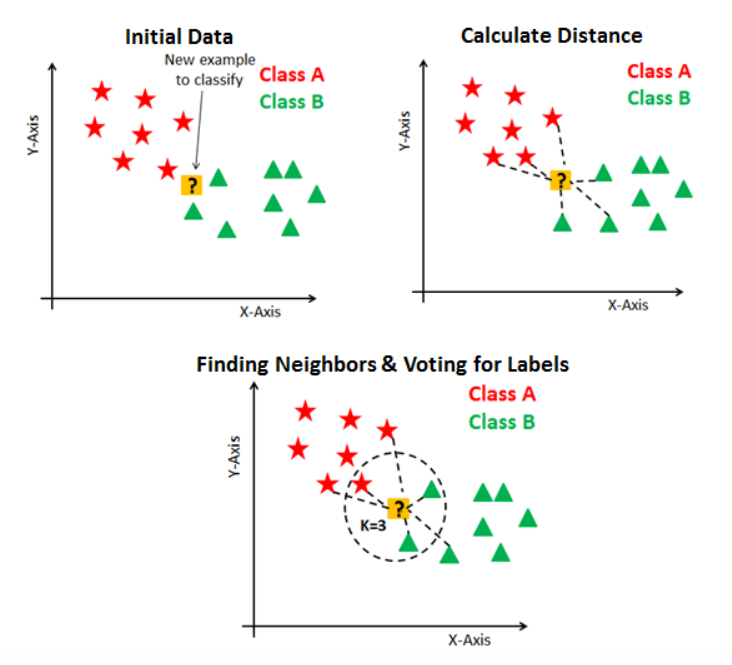

In [76]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

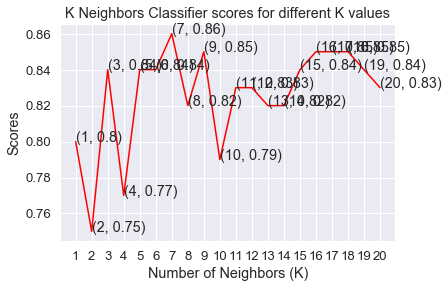

In [77]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

#### Resultado

In [78]:
print("O score para o K Neighbors Classifier é {}% com K= {} .".format(knn_scores[6]*100, 7))


O score para o K Neighbors Classifier é 86.0% com K= 7 .


## Naive Bayes

**Naive Bayes**

Naive Bayes é uma técnica de classificação estatística baseada no Teorema de Bayes e é um dos algoritmos mais simples. É um algoritmo rápido, preciso e confiável. Os classificadores Naive Bayes têm alta precisão e velocidade em grandes conjuntos de dados.

O classificador assume que o efeito de um recurso específico de uma classe é independente de outros recursos. Por exemplo, um solicitante de empréstimo é desejável ou não, dependendo de sua renda, histórico anterior de empréstimos e transações, idade e local. Mesmo se esses recursos forem interdependentes, eles ainda serão considerados independentemente. Essa suposição simplifica a computação e é por isso que é considerada ingênua. Essa suposição é chamada independência condicional de classe.

O classificador Naive Bayes calcula a probabilidade de um evento nas seguintes etapas:

1. Calcula a probabilidade anterior para determinados rótulos de classe
2. Encontra a probabilidade de probabilidade com cada atributo para cada classe
3. Coloca esses valores na fórmula de Bayes e calcula a probabilidade posterior.
4. Vê qual classe tem uma probabilidade mais alta, dado que a entrada pertence à classe de probabilidade mais alta.


Exemplo esquemático:

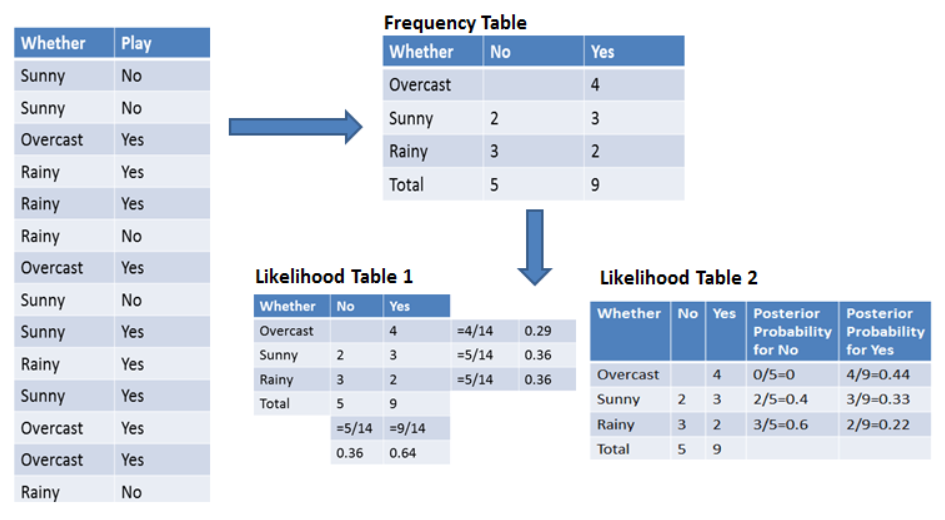

#### Resultado

In [79]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 83.25%
Test accuracy: 83.00%


## SVM

**Support Vector Machines (SVM)**

Geralmente, o Support Vector Machines é considerado uma abordagem de classificação, mas pode ser empregado em ambos os tipos de problemas de classificação e regressão. Ele pode manipular facilmente várias variáveis contínuas e categóricas. O SVM constrói um hiperplano no espaço multidimensional para separar diferentes classes. O SVM gera o hiperplano ideal - um plano de decisão que separa entre um conjunto de objetos com diferentes associações de classe - de maneira iterativa, que é usada para minimizar um erro. A idéia central do SVM é encontrar um hiperplano marginal máximo (MMH) que melhor divida o conjunto de dados em classes.

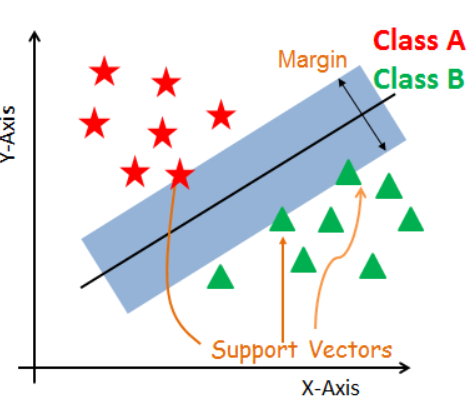

Esses "Support Vectors" (ou vetores de suporte) no gráfico acima são os pontos de dados mais próximos do hiperplano. Esses pontos definirão melhor a linha de separação calculando as margens e são mais relevantes para a construção do classificador.

Ele funciona da seguinta forma: 

1. Gera hiperplanos que segregam as classes da melhor maneira. Na figura a seguir do lado esquerdo são mostrados três hiperplanos - em preto, azul e laranja. O azul e o laranja têm um erro de classificação mais alto, mas o preto separa as duas classes corretamente.

2. É selecionado o hiperplano direito com a segregação máxima dos pontos de dados mais próximos, como mostra a figura do lado direito.

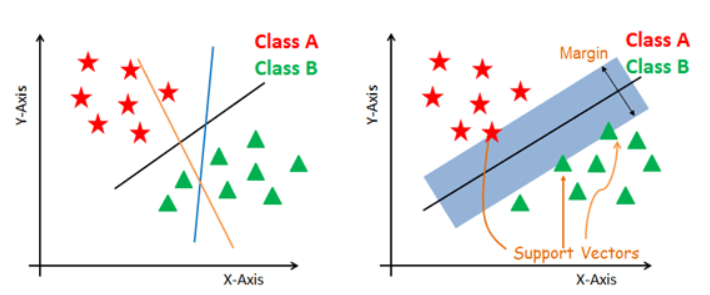

#### Resultado

In [81]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

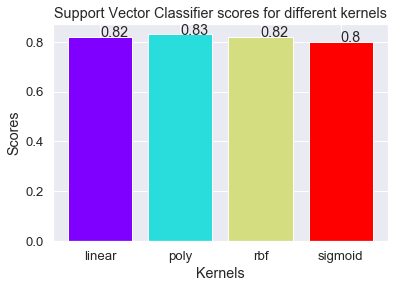

In [82]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [83]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 93.10%
Test accuracy: 82.00%


## Decision Tree

**Decision Tree Classifier**

Um Decision Tree Classifier é uma estrutura de árvore do tipo fluxograma em que um nó interno representa um recurso, o ramo representa uma regra de decisão e cada nó folha representa o resultado. O nó mais alto em uma árvore de decisão é conhecido como nó raiz, o qual particiona a árvore de maneira recursiva, chamada de particionamento recursivo. Tal estrutura auxilia na tomada de decisões.

A ideia por trás das Tree Classifiers envolve, basicamente, três passos:
- seleciona o melhor atributo usando o ASM (Attribute Selection Measures) para dividir os registros
- torna este atributo em um nó de decisão e divide o conjunto de dados em subconjuntos menores.
- Inicia a construção da árvore repetindo esse processo recursivamente para cada "child" até que uma das condições ocorra:  todas as tuplas pertencem ao mesmo valor de atributo, não há mais atributos restantes, ou não há mais instâncias.

Esquemático: 

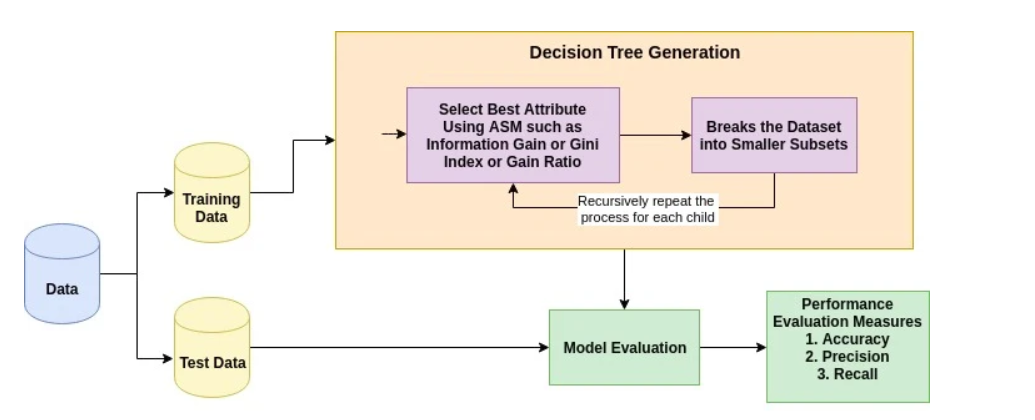

In [84]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

acurácia máxima: 0.8


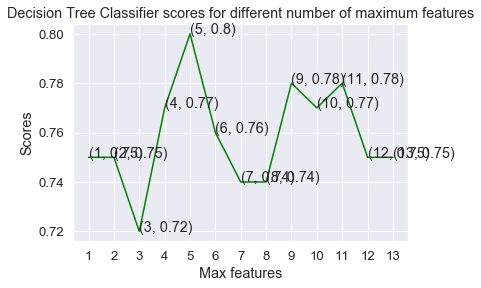

In [122]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
print("acurácia máxima: {}".format(dt_scores[4]))

O gráfico testa diferentes números de maximum features e relaciona com seus respectivos scores, facilitando, assim como o K Neighbors Classifier, a visualização do desempenho do algoritmo.

## Comparação das classificações

In [132]:
accuracy = []

classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

models = [KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(max_depth=3, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(kernel='poly'), RandomForestClassifier(n_estimators=110, random_state=2606)]

for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
    
    
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.86
Decision Trees,0.78
Logistic Regression,0.81
Naive Bayes,0.83
SVM,0.83
Random Forests,0.83


Testando todos os algaritmos para a performance do machine learning e colocando-os em uma tabela, é possível compará-los e analisar aquele com maior acurácia, que no caso foi o KNN com 86%. Observa-se que os outros algoritmos não tiveram resultados tão diferentes deste, cerca de 80%, o que já é consideravelmente aceitável.

# Aperfeiçoando os classificadores

In [136]:
dados=pd.read_csv("heart.csv")
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Visando melhorar o desempenho do classificador, optou-se por retirar os atributos menos relacionados e benéficos à classificação. A escolha destes foi baseada naqueles que mostraram na regressão logística, um valor p superior ao alfa escolhido. São estes: idade, pressão, colesterol e glicemia.

In [137]:
dados=dados.loc[:,[ 'sexo', 'dores_peito',
       'eletrocar_repouso', 'freq_card_max', 'angina_exercicio',
       'efeito_exercicio', 'eletrocar_exercicio', 'vasos', 'hemoglobina',
       'diagnostico']]

dados.head()

,sexo,dores_peito,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,1,3,0,150,0,2.3,0,0,1,1
1,1,2,1,187,0,3.5,0,0,2,1
2,0,1,0,172,0,1.4,2,0,2,1
3,1,1,1,178,0,0.8,2,0,2,1
4,0,0,1,163,1,0.6,2,0,2,1


### Separação de teste e treinamento

In [138]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

In [139]:
print ("Quantidade treinamento dos atributos: " + str(X_train.shape))
print ("Quantidade treinamento do target: " + str(y_train.shape))
print ("Quantidade teste dos atributos: " + str(X_test.shape))
print ("Quantidade teste do target: " + str(y_test.shape))

Quantidade treinamento dos atributos: (203, 9)
Quantidade treinamento do target: (203,)
Quantidade teste dos atributos: (100, 9)
Quantidade teste do target: (100,)


## Random Forest Classifier

Train accuracy: 100.00%
Test accuracy: 80.00%


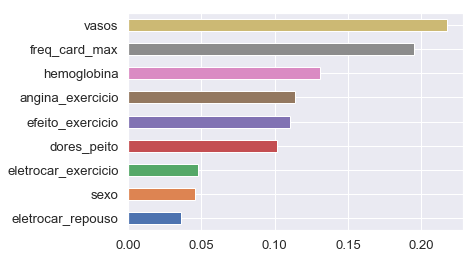

In [141]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

Visualização dos atributos que melhor influenciam positivamente a acurácia do machine learning, utilizando o algoritmo de Random Forest Classifier.

## Logistic Regression

In [143]:
import statsmodels.formula.api as sm
model=sm.Logit(y_train,X_train)
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.310719
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            diagnostico   No. Observations:                  203
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            8
Date:                Mon, 18 Nov 2019   Pseudo R-squ.:                  0.5508
Time:                        17:45:02   Log-Likelihood:                -63.076
converged:                       True   LL-Null:                       -140.41
                                        LLR p-value:                 2.079e-29
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
sexo                   -1.3811      0.542     -2.547      0.011      -2.444      -0.318
dores_peito             1.0258      0.245      4.190      0.000       0.546       1.506
eletrocar_repouso       0.6443      0.450      1.431      0.153      -0.238       1.527
freq_card_max           0.0197      0.007      2.910      0.004       0.006       0.033
angina_exercicio       -1.1057      0.507     -2.183      0.029      -2.098      -0.113
efeito_exercicio       -0.4826      0.274     -1.761      0.078      -1.020       0.055
eletrocar_exercicio     1.0471      0.414      2.531      0.011       0.236       1.858
vasos                  -1.5709      0.359     -4.380      0.000      -2.274      -0.868
hemoglobina            -1.3483      0.376     -3.588      0.000      -2.085      -0.612
=======================================================================================
"""

Nota-se pela coluna de valor p da tabela que a maior parte das variáveis possui o valor p menor que alfa (0.05). Isso mostra que os dados são importantes e auxiliam os classificadores na previsão da variável diagnóstico.

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)


C:\Users\gabic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.8


## K-Neighbors Classifier

In [150]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

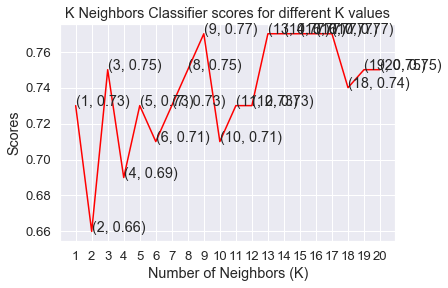

In [151]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [152]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.82


## Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 82.27%
Test accuracy: 85.00%


## SVM

#### Resultado

In [158]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

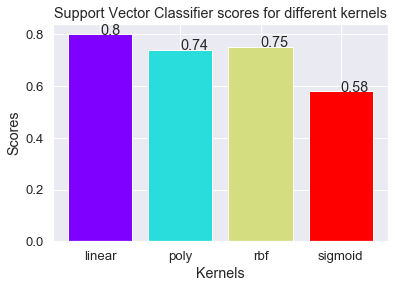

In [159]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

## Decision Tree

In [160]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

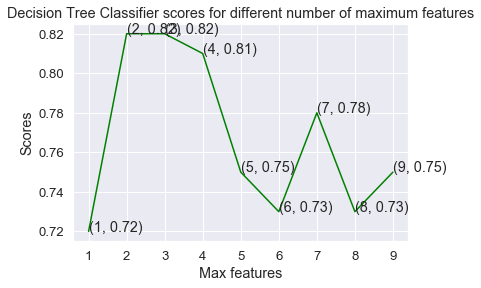

In [161]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

## Comparação das classificações

In [165]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(max_depth=3, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
    
    
    
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.77
Decision Trees,0.78
Logistic Regression,0.80
Naive Bayes,0.85
SVM,0.80
Random Forests,0.80


O desempenho do classificador com menos variáveis (mais relevantes) foi praticamente o mesmo. Ao contrário do que era esperado, a retirada de atributos não melhorou o classificador.

# Considerações finais

Em geral, os classificadores tiveram um bom desempenho, superior a 85%.
O resultado após algumas variáveis serem retiradas (aperfeiçoamento) foi interessante ao mostrar resultados de acurácia muito próximos àqueles obtidos previamente. Entretanto, deve-se considerar que nessa segunda iteração vários exames foram desconsiderados. Isso mostra que na determinação de doenças cardíacas aqueles testes podem ser retirados sem grandes impactos na acurácia da previsão, o que implica um menor gasto com os exames por parte do hospital e uma demanda de tempo inferior por parte do paciente.


Além disso, conforme o uso de ferramentas semelhantes à aqui utilizada se tornar mais frequente e os dataframes se atualizarem com cada vez mais pacientes, o algoritmo terá  uma melhor base para aprendizagem. Dessa maneira, a tendência é que se torne cada vez mais preciso, fornecendo um diagnóstico quase certeiro.


A utilidade de um algoritmo de previsão de doenças é marcante no campo da medicina. Classificadores como o desenvolvido neste projeto possuem a capacidade de otimizar a identificação doenças, fornecendo grande acurácia diagnóstica em um período de tempo curto. Ao facilitarem o reconhecimento de efermidades não apenas facilitam o trabalho de profissionais da saúde, mas também possibilitam o início de um tratamento mais cedo para o paciente. 
É importante  ressaltar que o classificador desenvolvido neste projeto para doenças cardíacas pode ser aplicado a diversas outras efermidades, em diferentes áreas da medicina.
Na verdade, uso de Machine Learning já foi documentado e vem sendo utilizado em áreas como detecção de câncer, doenças neurológicas e respiratórias.
Vale enfatizar que tais ferramentas não têm o intuito de substituir profissionais da saúde, mas sim de facilitar e otimizar seu trabalho.


Portanto, a implementação de algoritimos de previsão de doenças possui um potencial revolucionário no que tange à pratica de medicina tradicional, trazendo benefícios a todos os envolvidos.

__________________
## Referências

- https://www.kaggle.com/RONITF/HEART-DISEASE-UCI
- https://www.paho.org/bra/index.php?option=com_content&view=article&id=5253:doencas-cardiovasculares&Itemid=1096
- https://www.health.harvard.edu/heart-health/the-heart-attack-gender-gap
- https://www.teses.usp.br/teses/disponiveis/85/85131/tde-05112009-103703/publico/JuremaAparecidaDeMiranda.pdf
- https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/